In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
sns.set_context('talk')

In [3]:
import os 
import sys
from glob import glob

In [4]:
import numpy as np
import pandas as pd

In [5]:
import xarray as xr

In [6]:
dpath = '../../data/podaac'

In [7]:
opath = os.path.join(dpath, 'NZ_region')

### get the list of files and sort chronologically 

In [8]:
lfiles = glob(os.path.join(opath, "*-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc"))

In [9]:
lfiles.sort()

In [10]:
lfiles[:10]

['../../data/podaac/NZ_region/19810901120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810902120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810903120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810904120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810905120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810906120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810907120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810908120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810909120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/19810910120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv

In [11]:
lfiles[-10:]

['../../data/podaac/NZ_region/20190105120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190106120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190107120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190108120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190109120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190110120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190111120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190112120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190113120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc',
 '../../data/podaac/NZ_region/20190114120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv

### opens the dataset and cast into a `pandas.DataFrame`

In [15]:
dset = xr.open_mfdataset(lfiles)

In [16]:
df = dset[['analysed_sst']].to_dataframe()

In [17]:
df.head()

,analysed_sst
time,
1981-09-01,286.262512
1981-09-02,286.279022
1981-09-03,286.276276
1981-09-04,286.225037
1981-09-05,286.136505


### converts from Kelvin to degrees Celsius 

In [18]:
df = df - 273.15 

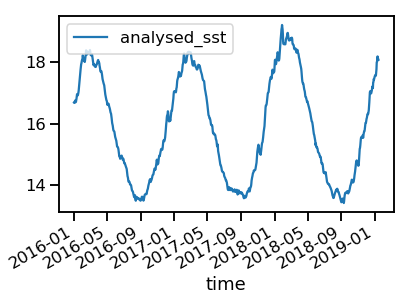

In [19]:
df.loc['2016':,:].plot()

### calculates the 5 days running average from the daily data 

In [20]:
df_5d = df.rolling(window=5, min_periods=5).mean()

In [21]:
df.tail()

,analysed_sst
time,
2019-01-10,18.118494
2019-01-11,18.192133
2019-01-12,18.068811
2019-01-13,18.119074
2019-01-14,18.081446


### function to calculate the anomalies WRT the 1982 - 2010 long term average

In [22]:
def demean(x): 
    anoms = x - x.loc['1982':'2010',].mean()
    return anoms

### calculates the 5days anomalies 

In [23]:
df_5d_anoms = df_5d.groupby(df_5d.index.dayofyear).apply(demean)

### keep the climatology 

In [24]:
clim = df_5d.loc['1982':'2010',:]

In [25]:
clim = clim.groupby(clim.index.dayofyear).mean()

In [26]:
df_5d.loc[:,'doy'] = df_5d.index.dayofyear

In [27]:
df_5d.loc[:, 'clim'] = np.nan

### concatenate the raw values and the repeated climatology 

In [28]:
for i in range(len(df_5d)): 
    df_5d.iloc[i, -1] = clim.loc[df_5d.iloc[i, -2],].values[0]

In [29]:
df_5d.head()

,analysed_sst,doy,clim
time,,,
1981-09-01,NaN,244,13.104349
1981-09-02,NaN,245,13.108551
1981-09-03,NaN,246,13.112900
1981-09-04,NaN,247,13.115567
1981-09-05,13.085871,248,13.119040


In [30]:
df_5d.tail()

,analysed_sst,doy,clim
time,,,
2019-01-10,17.921192,10,16.940124
2019-01-11,18.021412,11,16.968962
2019-01-12,18.079682,12,16.997468
2019-01-13,18.103296,13,17.029860
2019-01-14,18.115992,14,17.068139


### plot

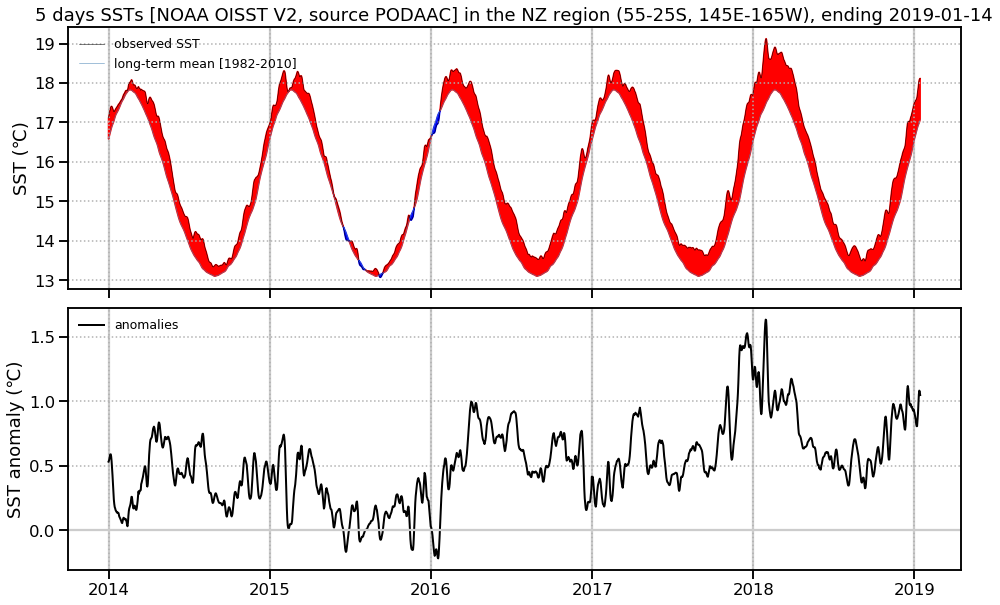

In [32]:
f, axes = plt.subplots(nrows=2, figsize=(16, 10), sharex=True)

f.subplots_adjust(hspace=0.07)

ax = axes[0]

df_t = df_5d.loc['2014-01':,['analysed_sst','clim']]

ax.plot(df_t.index, df_t.analysed_sst, color='k', label="observed SST", lw=0.5)
ax.plot(df_t.index, df_t.clim, color='steelblue', label='long-term mean [1982-2010]', lw=0.5)

ax.legend(frameon=False, fontsize='x-small', loc=2)

ax.fill_between(df_t.index, df_t.analysed_sst, df_t.clim, where=(df_t.analysed_sst >= df_t.clim), color='r', interpolate=True)
ax.fill_between(df_t.index, df_t.analysed_sst, df_t.clim, where=(df_t.analysed_sst < df_t.clim), color='b', interpolate=True)

ax.grid(ls=':')

ax.set_title('5 days SSTs [NOAA OISST V2, source PODAAC] in the NZ region (55-25S, 145E-165W), ending 2019-01-14')

ax.set_ylabel(u'SST (℃)')

for y in df_t.index.year.unique(): 
    ax.axvline('{}-01-01'.format(y), color='0.8', zorder=-1)

ax = axes[1]

anoms = df_t.analysed_sst - df_t.clim 

ax.plot(anoms.index, anoms, lw=2, color='k', label='anomalies')

ax.legend(frameon=False, fontsize='x-small', loc=2)

ax.axhline(0, color='0.8')

for y in anoms.index.year.unique(): 
    ax.axvline('{}-01-01'.format(y), color='0.8', zorder=-1)

ax.grid(ls=':')

ax.set_ylabel(u'SST anomaly (℃)')

f.savefig('../../figures/OISST_5d_average_NZ_region.png', dpi=200)